In [212]:
# Restaurant rating prdiction using Yelp API

In [213]:
import pandas as pd 
import requests
import csv
from bs4 import BeautifulSoup
import json
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [214]:
# Data acquisition- Yelp API

In [215]:
# # Yelp API endpoint
# url = "https://api.yelp.com/v3/businesses/search"

# # Set your Yelp API key here
# api_key = "ZD6mo9uhBu1r47JiATdVhe6sJs2_hPLki2IH6v9YzKpPLHqOMuebguyIn64ZmvvRqndrchjhh5iYCTaBtVYiZQv1ph8qBJoi-iW55MMLd9_4n3RhHpWFIklcpWlmZHYx"
# businesses = []
# # Parameters for the search
# for city in ['NYC','San Francisco','Los Angeles']:
#   for num in range(1,5):
#     time.sleep(2)
#     params = {
#         "location": city,  # Example: Search businesses in San Francisco
#         "limit": 19,  # Number of results per request
#         "offset": 0 , # Starting offset for pagination
#         "price": str(num)
#     }

#     # Number of businesses to retrieve
#     desired_count =  len(businesses)+950
#     while len(businesses) < desired_count:
#         print(len(businesses))
#         # Make a request to the Yelp API
#         headers = {"Authorization": f"Bearer {api_key}"}
#         response = requests.get(url, headers=headers, params=params)
#         data = response.json()
#         # print(data)
#         # Extract business details from the response
#         x = len(businesses)
#         for business in data["businesses"]:
#             print(business)
#             transactions = business.get("transactions", [])
#             delivery = 1 if "delivery" in transactions else 0
#             pickup = 1 if "pickup" in transactions else 0       
#             business_details = {
#                 "id":business["id"],
#                 "name": business["name"],
#                 "zipcode": business["location"]["zip_code"],
#                 "categories": ", ".join(category["title"] for category in business["categories"]),
#                 "pickup": pickup,
#                 "delivery": delivery,
#                 "price_range": business.get("price", ""),
#                 "rating": business.get("rating", "")
#             }
#             businesses.append(business_details)
#             # print(businesses)  
#         # Update the offset for the next request
#         if  x == len(businesses):
#             break
#         params["offset"] += params["limit"]



In [216]:
# # Yelp API endpoint
# url = "https://api.yelp.com/v3/businesses/search"

# # Set your Yelp API key here
# api_key = "X5pBAYJoNxvYnbcJycQzc0RGJiDOQZ6s9ZeZn6TtvjzFJRXrLVy7vOQOCTI5F7Cs77-09QXCBdZ1eU8UvzTK4wROKCnJPwK5rqviSrOjlbfTiG-1E0ZsrzdDkDNmZHYx"
# # businesses = []
# # Parameters for the search
# #'NYC','San Francisco','Los Angeles']:

# params = {
#     "location": 'Los Angeles',  # Example: Search businesses in San Francisco
#     "limit": 19,  # Number of results per request
#     "offset": 0 , # Starting offset for pagination
#     "price": '4'
# }

# # Number of businesses to retrieve
# desired_count =  len(businesses)+950
# while len(businesses) < desired_count:
#     print(len(businesses))
#     # Make a request to the Yelp API
#     headers = {"Authorization": f"Bearer {api_key}"}
#     response = requests.get(url, headers=headers, params=params)
#     data = response.json()
#     print(data)
#     # Extract business details from the response
#     x = len(businesses)
#     for business in data["businesses"]:
#         print(business)
#         transactions = business.get("transactions", [])
#         delivery = 1 if "delivery" in transactions else 0
#         pickup = 1 if "pickup" in transactions else 0       
#         business_details = {
#             "id":business["id"],
#             "name": business["name"],
#             "zipcode": business["location"]["zip_code"],
#             "categories": ", ".join(category["title"] for category in business["categories"]),
#             "pickup": pickup,
#             "delivery": delivery,
#             "price_range": business.get("price", ""),
#             "rating": business.get("rating", "")
#         }
#         businesses.append(business_details)
#         # print(businesses)  
#     # Update the offset for the next request
#     # if  x == len(businesses):
#     #     break
#     params["offset"] += params["limit"]
#     print("************************")
#     print(params["offset"])

In [217]:
# # Save the retrieved businesses to a CSV file
# filename = "data.csv"
# fields = ["id","name", "zipcode",  "categories", "pickup", "delivery", "price_range", "rating"]

# with open(filename, mode="w", newline="") as file:
#     writer = csv.DictWriter(file, fieldnames=fields)
#     writer.writeheader()
#     writer.writerows(businesses[:])  # Write the desired number of businesses

# print(f"Business details saved to {filename}!")

In [218]:
## created DF 
df = pd.read_csv(r"C:\Users\HP\Downloads\data.csv")
df.head()

,id,name,zipcode,categories,pickup,delivery,price_range,rating
0,zj8Lq1T8KIC5zwFief15jg,Prince Street Pizza,10012.0,"pizza, italian",1,1,$,4.5
1,j1S3NUrkB3BVT49n_e76NQ,Best Bagel & Coffee,10001.0,"bagels, coffee & tea, breakfast & brunch",1,1,$,4.5
2,SULHf6nGQ8sK0UpG1XU30w,Los Tacos No.1,10036.0,tacos,0,1,$,4.5
3,v1DHGRNCH9247WLYoaoA9A,L'industrie Pizzeria,11211.0,pizza,0,1,$,4.5
4,vk7W3_sQwr7eZbRFsXv6rw,Taiyaki NYC,10013.0,"desserts, japanese, ice cream & frozen yogurt",0,1,$,4.5


In [219]:
###Data Analysis
#We want to understand which variables are important, view summary statistics, and visualize the data.

In [220]:
df.shape

(7785, 8)

In [221]:
df.describe()

,zipcode,pickup,delivery,rating
count,7784.000000,7785.000000,7785.000000,7785.000000
mean,58646.904162,0.579576,0.788311,4.101606
std,40229.920234,0.493659,0.408532,0.457625
min,7002.000000,0.000000,0.000000,1.000000
25%,10028.000000,0.000000,1.000000,4.000000
50%,90017.000000,1.000000,1.000000,4.000000
75%,94103.000000,1.000000,1.000000,4.500000
max,95838.000000,1.000000,1.000000,5.000000


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7785 entries, 0 to 7784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7785 non-null   object 
 1   name         7785 non-null   object 
 2   zipcode      7784 non-null   float64
 3   categories   7785 non-null   object 
 4   pickup       7785 non-null   int64  
 5   delivery     7785 non-null   int64  
 6   price_range  7785 non-null   object 
 7   rating       7785 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 486.7+ KB


In [223]:
## Explaining each feauture and its input 
## id - not need
## name - 
## zipcode - 
## categories - i want to split categories to col because to 1 or 0 in the category spesific and that to get more activity ..
## pickup - 
## delivery - 
## price_range - i want to convert $ to numbers beacse שאפשר לחזות 
## rating - 

In [224]:
## convert $ to number
for index, value in df['price_range'].iteritems():
    string_value = str(value)
    length = len(string_value)
    df.at[index, 'price_range'] = length
df.head()

,id,name,zipcode,categories,pickup,delivery,price_range,rating
0,zj8Lq1T8KIC5zwFief15jg,Prince Street Pizza,10012.0,"pizza, italian",1,1,1,4.5
1,j1S3NUrkB3BVT49n_e76NQ,Best Bagel & Coffee,10001.0,"bagels, coffee & tea, breakfast & brunch",1,1,1,4.5
2,SULHf6nGQ8sK0UpG1XU30w,Los Tacos No.1,10036.0,tacos,0,1,1,4.5
3,v1DHGRNCH9247WLYoaoA9A,L'industrie Pizzeria,11211.0,pizza,0,1,1,4.5
4,vk7W3_sQwr7eZbRFsXv6rw,Taiyaki NYC,10013.0,"desserts, japanese, ice cream & frozen yogurt",0,1,1,4.5


In [225]:
##split categories
##עשיתי את השורה הזאת כבר אך לא יכול להחזיר את זה לאותיות גדולות כמו שקיבלתי כי אז אצטרך להוציא שוב וזה יקח המון זמן
df['categories'] = df['categories'].apply(lambda x: x.lower())
categories = ['American', 'Italian', 'Asia', 'breakfast', 'bar', 'others']
df[categories] = 0

category_lists = {
    'American': ['american', 'steakhouse', 'chicken', 'burger', 'hamburger', 'steak', 'fast food', 'donuts'],
    'Asia': ['dim sum', 'sushi', 'japanese', 'chinese', 'thai', 'viet', 'vietnamese', 'taiwanese', 'noodles', 'ramen', 'curry', 'malaysian', 'cambodian'],
    'bar': ['bar', 'pub', 'cocktails', 'drinks', 'party', 'club'],
    'breakfast': ['brunch', 'coffee', 'bagel', 'breakfast', 'tea', 'sandwich', 'bakeries', 'delis'],
    'Italian': ['italian', 'pizza', 'pasta', 'gelato']
}

for index, category in df['categories'].iteritems():
    found_category = False
    for cat, cat_list in category_lists.items():
        if any(x in category for x in cat_list):
            df.at[index, cat] = 1
            found_category = True
    if not found_category:
        df.at[index, 'others'] = 1
df.head()

,id,name,zipcode,categories,pickup,delivery,price_range,rating,American,Italian,Asia,breakfast,bar,others
0,zj8Lq1T8KIC5zwFief15jg,Prince Street Pizza,10012.0,"pizza, italian",1,1,1,4.5,0,1,0,0,0,0
1,j1S3NUrkB3BVT49n_e76NQ,Best Bagel & Coffee,10001.0,"bagels, coffee & tea, breakfast & brunch",1,1,1,4.5,0,0,0,1,0,0
2,SULHf6nGQ8sK0UpG1XU30w,Los Tacos No.1,10036.0,tacos,0,1,1,4.5,0,0,0,0,0,1
3,v1DHGRNCH9247WLYoaoA9A,L'industrie Pizzeria,11211.0,pizza,0,1,1,4.5,0,1,0,0,0,0
4,vk7W3_sQwr7eZbRFsXv6rw,Taiyaki NYC,10013.0,"desserts, japanese, ice cream & frozen yogurt",0,1,1,4.5,0,0,1,0,0,0


In [226]:
#remove the coloms the i dont need to לחזות
df = df.drop(['categories','id' ,'zipcode' ], axis=1)
df.head()

,name,pickup,delivery,price_range,rating,American,Italian,Asia,breakfast,bar,others
0,Prince Street Pizza,1,1,1,4.5,0,1,0,0,0,0
1,Best Bagel & Coffee,1,1,1,4.5,0,0,0,1,0,0
2,Los Tacos No.1,0,1,1,4.5,0,0,0,0,0,1
3,L'industrie Pizzeria,0,1,1,4.5,0,1,0,0,0,0
4,Taiyaki NYC,0,1,1,4.5,0,0,1,0,0,0


In [227]:
desired_order = [ 'name', 'Italian', 'breakfast', 'Asia', 'American', 'bar', 'others',
                 'pickup', 'delivery', 'price_range', 'rating']

# Reindex the DataFrame with the desired column order
df = df.reindex(columns=desired_order)
df.head()

,name,Italian,breakfast,Asia,American,bar,others,pickup,delivery,price_range,rating
0,Prince Street Pizza,1,0,0,0,0,0,1,1,1,4.5
1,Best Bagel & Coffee,0,1,0,0,0,0,1,1,1,4.5
2,Los Tacos No.1,0,0,0,0,0,1,0,1,1,4.5
3,L'industrie Pizzeria,1,0,0,0,0,0,0,1,1,4.5
4,Taiyaki NYC,0,0,1,0,0,0,0,1,1,4.5


In [228]:
df.tail()

,name,Italian,breakfast,Asia,American,bar,others,pickup,delivery,price_range,rating
7780,Sushi Tsujita,0,0,1,0,1,0,1,1,4,4.0
7781,SHU Sushi House Unico,0,0,1,0,1,0,0,1,4,4.5
7782,BOA Steakhouse,0,1,0,1,0,0,1,1,4,4.0
7783,MORIHIRO,0,0,1,0,1,0,0,0,4,4.5
7784,Matsuhisa,0,0,1,0,1,0,0,1,4,4.0


In [229]:
#Check how many values are null in each column
df[df.columns[:]].isnull().sum()

name           0
Italian        0
breakfast      0
Asia           0
American       0
bar            0
others         0
pickup         0
delivery       0
price_range    0
rating         0
dtype: int64

In [230]:
df.describe()

,Italian,breakfast,Asia,American,bar,others,pickup,delivery,rating
count,7785.000000,7785.000000,7785.000000,7785.000000,7785.000000,7785.000000,7785.000000,7785.000000,7785.000000
mean,0.120103,0.321130,0.168401,0.214001,0.310726,0.198972,0.579576,0.788311,4.101606
std,0.325103,0.466941,0.374246,0.410154,0.462820,0.399253,0.493659,0.408532,0.457625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,4.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [231]:
# Calculating the number of restaurants for each rating
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Number_of_Restaurants']
print(rating_counts)

   Rating  Number_of_Restaurants
0     4.0                   3585
1     4.5                   2619
2     3.5                    965
3     5.0                    323
4     3.0                    209
5     2.5                     51
6     2.0                     22
7     1.5                      7
8     1.0                      4


In [232]:
# Checking how many resturant rating are above 4 and 3.5
print(df[df['rating']>4].shape[0])
print(df[df['rating']>3.5].shape[0])

2942
6527


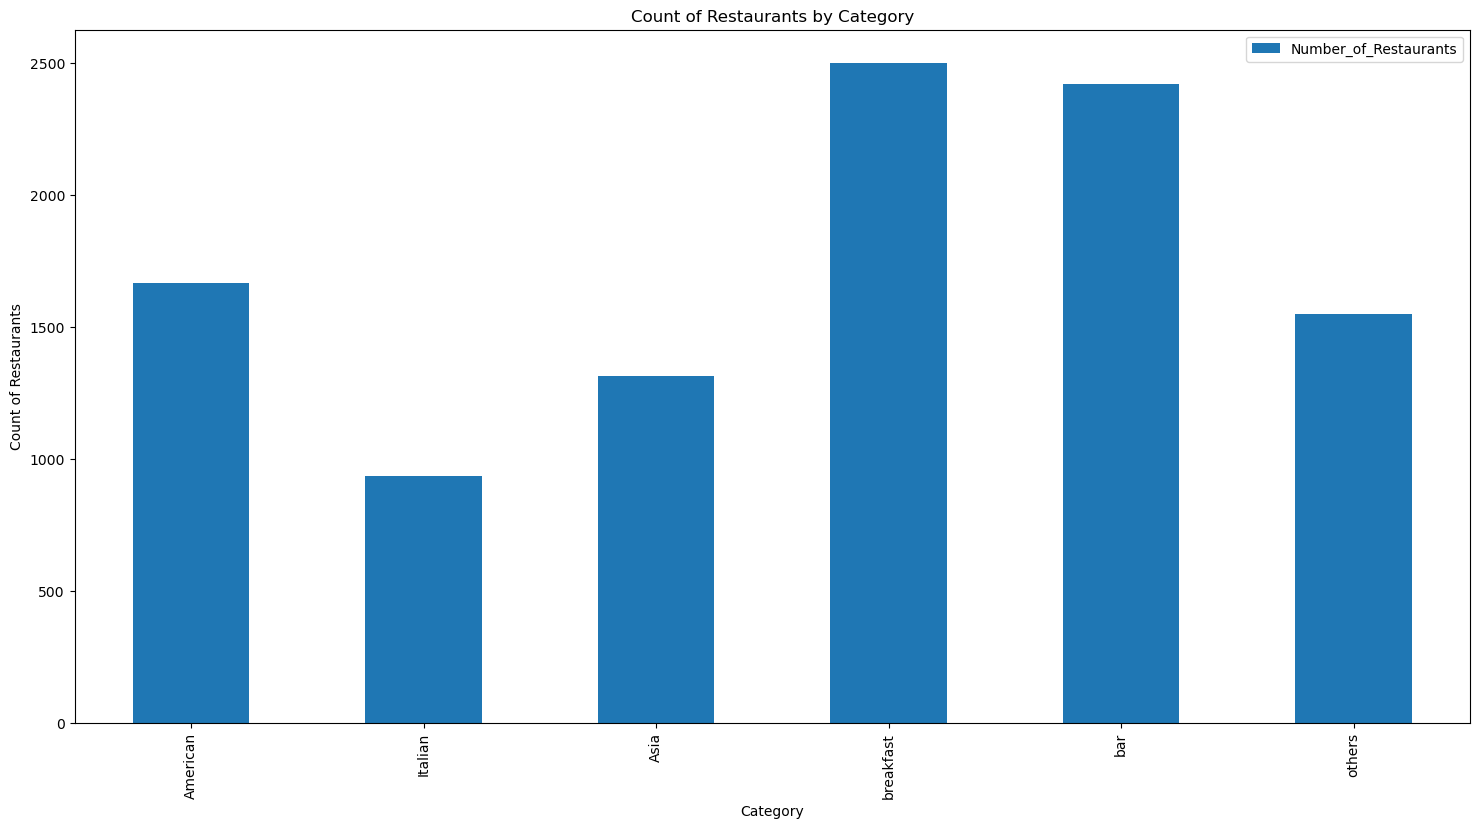

In [233]:
#plotting a graph of how many resturants got what category.
plt.rcParams['figure.figsize'] = (18, 9)
categories = ['American', 'Italian', 'Asia', 'breakfast', 'bar', 'others']
counts = [df[category].sum() for category in categories]
rating_counts = pd.DataFrame({'Category': categories, 'Number_of_Restaurants': counts})
rating_counts.plot(x='Category', y='Number_of_Restaurants', kind='bar')
plt.xlabel('Category')
plt.ylabel('Count of Restaurants')
plt.title('Count of Restaurants by Category')
plt.show()



<AxesSubplot:>

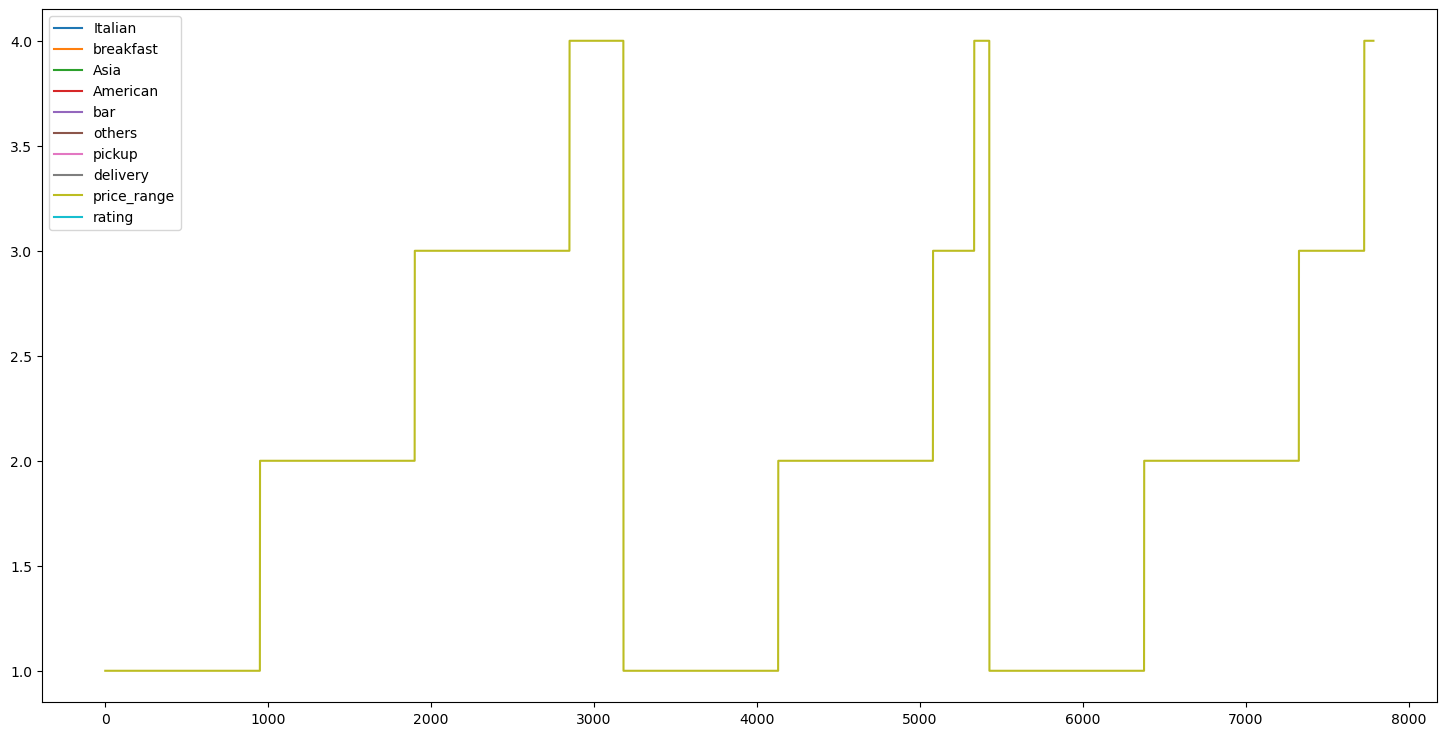

In [239]:
outliers = df
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
outliers.plot()

In [235]:
## cleaning the data with explanation and explaining the data that you kept 
## Also data analysis (things thats you see that might affect)
## point out how many of each resteraunts 

SyntaxError: invalid syntax (3136986764.py, line 2)

In [ ]:
### prediction
### frist try to do dummy predicition 
### then use linear regression (There are a few different ones, USE LINEAR REGRESSION)
### remember to split your data 

In [ ]:
### add at the end confusion matrix 

In [ ]:
### conclusion 